In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
from PIL import Image
%matplotlib inline

In [2]:
train_dataset = h5py.File('datasets/train_catvnoncat.h5', "r")
train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # train set features
train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # train set labels

In [3]:
test_dataset = h5py.File('datasets/test_catvnoncat.h5', "r")
test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # test set features
test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # test set labels

In [4]:
classes = np.array(test_dataset["list_classes"][:])

In [5]:
classes

array([b'non-cat', b'cat'], dtype='|S7')

In [6]:
train_set_y = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
test_set_y = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))

In [7]:
train_set_y

array([[0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
        0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
        0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
        1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
        1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
        0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1,
        0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1,
        0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
        0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]])

[1]
cat


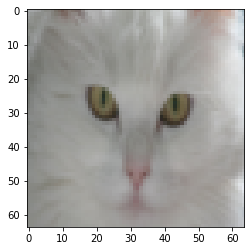

In [8]:
index = 50
plt.imshow(train_set_x_orig[index])
y = train_set_y[:, index]
y_class = classes[np.squeeze(train_set_y[:, index])].decode("utf-8")
print(y)
print(y_class)

In [9]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
import os
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


In [10]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  try:
    for gpu in gpus:
      tf.config.experimental.set_memory_growth(gpu, True)
    logical_gpus = tf.config.experimental.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    print(e)

1 Physical GPUs, 1 Logical GPUs


In [11]:
train_set_x_orig.shape

(209, 64, 64, 3)

In [12]:
train_set_y_orig.shape

(209,)

In [13]:
test_set_x_orig.shape

(50, 64, 64, 3)

In [14]:
test_set_y_orig.shape

(50,)

In [15]:
x_train, x_test, y_train, y_test = train_set_x_orig, test_set_x_orig, train_set_y_orig, test_set_y_orig

In [16]:
test_images_norm = x_test / 255.0
test_images_norm.shape

(50, 64, 64, 3)

In [17]:
train_images_norm = x_train / 255.0
train_images_norm.shape

(209, 64, 64, 3)

In [18]:
model = Sequential()

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())

model.add(Dense(128, input_shape = train_images_norm.shape[1:], activation='relu'))

model.add(Dense(128, activation='relu'))

model.add(Dense(2, 'softmax'))

In [19]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [20]:
model.fit(train_images_norm, y_train, epochs = 10, validation_split = 0.1)

Epoch 1/10

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

6/6 [==============================] - 14s 2s/step - loss: 0.6713 - accuracy: 0.6489 - val_loss: 0.5425 - val_accuracy: 0.8095
Epoch 2/10
6/6 [==============================] - 0s 27ms/step - loss: 0.6296 - accuracy: 0.6383 - val_loss: 0.5007 - val_accuracy: 0.8095
Epoch 3/10
6/6 [==============================] - 0s 26ms/step - loss: 0.5509 - accuracy: 0.6383 - val_loss: 0.4702 - val_accuracy: 0.8095
Epoch 4/10
6/6 [==============================] - 0s 24ms/step - loss: 0.5042 - accuracy: 0.

In [21]:
test_loss, test_accuracy = model.evaluate(test_images_norm, y_test)

2/2 [==============================] - 4s 2s/step - loss: 0.5354 - accuracy: 0.8600


In [22]:
print('Accuracy = ',test_accuracy)

Accuracy =  0.8600000143051147
